# **CREDIT CARD APPROVAL PREDICTION**
-----------

**Authors** : [Leah Katiwa](https://github.com/leah-katiwa) , [Ronald Nyagaka](https://github.com/Ronaldonyagaka), [Maureen Kitang'a](https://github.com/ndungek
), [Cliff Shitote](https://github.com/CliffShitote), [Beatrice Kirui](https://github.com/beatrice-kirui), [Paul Kamau](https://github.com/kamaupaul)

# 1. Business Understanding

## 1.1 Introduction

In the financial industry, credit score cards are extensively utilized to evaluate the risk associated with issuing credit cards to applicants. These cards utilize historical data to anticipate potential defaults and credit card borrowing patterns, enabling banks to make well-informed decisions regarding card approval. Nevertheless, the reliability of traditional approaches, such as assessing financial metrics like debt-to-income ratios and utilization ratios can be impacted by economic fluctuations. To enhance credit scoring, alternative methods like machine learning algorithms have been introduced. Although these methods enhance prediction accuracy, they often lack transparency, creating challenges in providing clear explanations for acceptance or rejection decisions to both customers and regulatory bodies.

## 1.2 Problem Statement

The existing credit scoring methods rely on historical data and traditional financial metrics like debt-to-income ratios, face limitations in accurately predicting creditworthiness due to economic fluctuations. The introduction of machine learning algorithms has shown promise in enhancing credit scoring accuracy but lacks transparency in explaining acceptance or rejection decisions. As a result, there is a need to develop a credit scoring model that leverages both historical data and advanced machine learning techniques to improve prediction capabilities while providing transparent and interpretable results for customers and regulators. The objective is to create a reliable and transparent credit scoring system that effectively assesses the risk of issuing credit cards based on applicants' personal information, contributing to informed decision-making by financial institutions and ensuring fair treatment of applicants.

The end user is the bank that will use this deployment in conjunction with their own to complement the credit scoring system

## 1.3 Project Objectives

1. Develop a credit scoring model that incorporates personal and social factors and machine learning algorithms to enhance the accuracy of creditworthiness predictions.
2. Improve transparency in credit scoring by utilizing interpretable machine learning techniques, allowing for clear explanations of acceptance or rejection decisions to customers and regulatory bodies.
3. Mitigate the impact of economic fluctuations on credit scoring models by incorporating dynamic factors and adapting the model to changing economic conditions.
4. Optimize the balance between prediction accuracy and interpretability to ensure a fair and reliable credit scoring system for both applicants and financial institutions.

# 2. Data Understanding
> This phase is broken down into four tasks together with its projected outcome or output in detail:
> - Collect Initial Data
> - Describe Data
> - Explore Data
> - Verify Data Quality

The data for this project was sourced from [Kaggle](https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction) . This data consists of information of past application and credits data.


In [293]:
#importing the relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score,ConfusionMatrixDisplay,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.ensemble import GradientBoostingClassifier
import joblib    
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import  KFold
from sklearn.model_selection import  learning_curve
import time

import warnings
warnings.filterwarnings('ignore')

## 2.1 Applications Dataset
>>> [Data Description](./data/Data%20Description.txt)

In [294]:
#loading the dataset
application = pd.read_csv("./data/application_record.csv")

#previewing the first few rows
application.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.000,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.000
1,5008805,M,Y,Y,0,427500.000,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.000
2,5008806,M,Y,Y,0,112500.000,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.000
3,5008808,F,N,Y,0,270000.000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.000
4,5008809,F,N,Y,0,270000.000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.000


In [295]:
class Describer:
    
    # initialize object
    def __init__(self, df):
        self.df = df
        
    # function to check shape of data
    def shape(self):
        out = print(f"The DataFrame has:\n\t* {self.df.shape[0]} rows\n\t* {self.df.shape[1]} columns", '\n')
        return out
    
    # function to check info on dataset
    def data_info(self):
        out = print(self.df.info(), '\n')
        return out
    
    # function to describe numerical columns
    def data_describe(self):
        out = self.df.describe()
        return out


In [296]:
describe = Describer(application)

# lets view the shape of the data

describe.shape()

The DataFrame has:
	* 438557 rows
	* 18 columns 



In [297]:
# lets print summary information on the dataset

describe.data_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [298]:
# getting a description of our data set
describe.data_describe().T

,count,mean,std,min,25%,50%,75%,max
ID,438557.000,6022176.270,571637.023,5008804.000,5609375.000,6047745.000,6456971.000,7999952.000
CNT_CHILDREN,438557.000,0.427,0.725,0.000,0.000,0.000,1.000,19.000
AMT_INCOME_TOTAL,438557.000,187524.286,110086.853,26100.000,121500.000,160780.500,225000.000,6750000.000
DAYS_BIRTH,438557.000,-15997.905,4185.030,-25201.000,-19483.000,-15630.000,-12514.000,-7489.000
DAYS_EMPLOYED,438557.000,60563.675,138767.800,-17531.000,-3103.000,-1467.000,-371.000,365243.000
FLAG_MOBIL,438557.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000
FLAG_WORK_PHONE,438557.000,0.206,0.405,0.000,0.000,0.000,0.000,1.000
FLAG_PHONE,438557.000,0.288,0.453,0.000,0.000,0.000,1.000,1.000
FLAG_EMAIL,438557.000,0.108,0.311,0.000,0.000,0.000,0.000,1.000
CNT_FAM_MEMBERS,438557.000,2.194,0.897,1.000,2.000,2.000,3.000,20.000


## 2.2 Credits Dataset
>>> [Data Description](./data/Data%20Description.txt)

In [299]:
# loading the dataset
credits = pd.read_csv("./data/credit_record.csv")

#previewing the first few rows
credits.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [300]:
describe = Describer(credits)

# lets view the shape of the data
# Checking the shape of dataset

describe.shape()

The DataFrame has:
	* 1048575 rows
	* 3 columns 



In [301]:
# lets print summary information on the dataset

describe.data_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB
None 



In [302]:
# getting a description of our data set

describe.data_describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1048575.000,5068286.425,46150.579,5001711.000,5023644.000,5062104.000,5113856.000,5150487.000
MONTHS_BALANCE,1048575.000,-19.137,14.023,-60.000,-29.000,-17.000,-7.000,0.000


## 2.3 Merged Dataset

In [303]:
## merging our two datasets
new_df = pd.merge(application, credits, on='ID', how='inner')

#previewing the first few rows
new_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.000,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.000,0,C
1,5008804,M,Y,Y,0,427500.000,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.000,-1,C
2,5008804,M,Y,Y,0,427500.000,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.000,-2,C
3,5008804,M,Y,Y,0,427500.000,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.000,-3,C
4,5008804,M,Y,Y,0,427500.000,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.000,-4,C


In [304]:
describer = Describer(new_df)

describer.shape()

The DataFrame has:
	* 777715 rows
	* 20 columns 



In [305]:
describer.data_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  object 
 2   FLAG_OWN_CAR         777715 non-null  object 
 3   FLAG_OWN_REALTY      777715 non-null  object 
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  object 
 7   NAME_EDUCATION_TYPE  777715 non-null  object 
 8   NAME_FAMILY_STATUS   777715 non-null  object 
 9   NAME_HOUSING_TYPE    777715 non-null  object 
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_MOBIL           777715 non-null  int64  
 13  FLAG_WORK_PHONE      777715 non-null  int64  
 14  FLAG_PHONE           777715 non-null  int64  
 15  FLAG_EMAIL       

In [306]:
describer.data_describe().T

,count,mean,std,min,25%,50%,75%,max
ID,777715.000,5078742.947,41804.425,5008804.000,5044568.500,5069530.000,5115551.000,5150487.000
CNT_CHILDREN,777715.000,0.428,0.746,0.000,0.000,0.000,1.000,19.000
AMT_INCOME_TOTAL,777715.000,188534.802,101622.450,27000.000,121500.000,162000.000,225000.000,1575000.000
DAYS_BIRTH,777715.000,-16124.937,4104.304,-25152.000,-19453.000,-15760.000,-12716.000,-7489.000
DAYS_EMPLOYED,777715.000,57775.825,136471.735,-15713.000,-3292.000,-1682.000,-431.000,365243.000
FLAG_MOBIL,777715.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000
FLAG_WORK_PHONE,777715.000,0.232,0.422,0.000,0.000,0.000,0.000,1.000
FLAG_PHONE,777715.000,0.301,0.459,0.000,0.000,0.000,1.000,1.000
FLAG_EMAIL,777715.000,0.092,0.289,0.000,0.000,0.000,0.000,1.000
CNT_FAM_MEMBERS,777715.000,2.209,0.907,1.000,2.000,2.000,3.000,20.000


## 3. Data Preparation
> This phase, which is often referred to as “data munging”, prepares the final data set(s) for modeling. It has the following tasks:
> - Clean Data
> - EDA
> - Data Preprocessing


## 3.1 Clean Data
> In this section, we will be looking at the missing values, duplicate records in the dataset as well as the outliers in the dataset.

### 3.1.1 Completeness
> We will be considering the completeness of the dataset in this section. In this section, we will be looking at the missing values in the dataset.

In [307]:
def missing_values(df):
    """
    Returns the columns with missing values along with the number and percentage of missing values.
    
    Args:
        df (pandas.DataFrame): The DataFrame to analyze.
    
    Returns:
        pandas.DataFrame: A DataFrame with columns 'Column Name', 'Missing Values', and 'Missing Percentage'.
    """
    total_missing = df.isnull().sum()
    percent_missing = (total_missing / len(df)) * 100
    missing_data = pd.DataFrame({
        'Column Name': total_missing.index,
        'Missing Values': total_missing.values,
        'Missing Percentage': percent_missing.values
    })
    columns_with_missing_values = missing_data[missing_data['Missing Values'] > 0]
    return columns_with_missing_values


In [308]:
missing_values(new_df)

,Column Name,Missing Values,Missing Percentage
16,OCCUPATION_TYPE,240048,30.866


The `OCCUPATION_TYPE` column with missing values exhibits a diverse range of income types.
Since the missing values account for approximately 31 percent of the column, we cannot make assumptions about the income types associated with these occupations.
Consequently, we will impute the NaN values in the column with the term **unspecified** to handle the missing data appropriately.

In [309]:
# replacing null values
new_df['OCCUPATION_TYPE'].fillna('unspecified', inplace =True)

### 3.1.2 Uniformity
> In this section, we will be looking at the uniformity of the data. Uniformity refers to the consistency of the data with respect to the formatting, labelling. We will be looking at the following:
> - Labelling
> - Formatting

#### 3.1.2.1 Labelling
> Labelling refers to the consistency of the data with respect to the labelling of the data. We will be looking at the following:
> - Are the columns small case?
> - Are there any spaces?
> - Are they interpretable?

We will be writing a function that will rename the columns in the dataset

In [310]:
def rename_columns(df, column_mapping):
    """
    Renames columns in a DataFrame.
    
    Args:
        df (pandas.DataFrame): The DataFrame whose columns need to be renamed.
        column_mapping (dict): A dictionary mapping current column names to new column names.
    
    Returns:
        pandas.DataFrame: The DataFrame with renamed columns.
    """
    df = df.rename(columns=column_mapping)
    return df

In [311]:
# Define a dictionary with column mappings
column_mapping = {
    'CODE_GENDER': 'Gender', 
    'FLAG_OWN_CAR': 'Own_Car', 
    'FLAG_OWN_REALTY':'Own_Property',
    'CNT_CHILDREN':'Num_Children',
    'AMT_INCOME_TOTAL':'Total_Income',
    'NAME_INCOME_TYPE':'Income_Type',
    'NAME_EDUCATION_TYPE':'Education_Level',
    'NAME_FAMILY_STATUS':'Family_Status',
    'NAME_HOUSING_TYPE':'Housing_Type',
    'DAYS_BIRTH':'age(days)',
    'DAYS_EMPLOYED':'Employment_Duration',
    'FLAG_WORK_PHONE':'Work_Phone',
    'FLAG_MOBIL':'Mobile',
    'FLAG_PHONE':'Phone',
    'FLAG_EMAIL':'Email',
    'OCCUPATION_TYPE':'Occupation',
    'CNT_FAM_MEMBERS':'Num_Family',
    'STATUS': 'Status',
    'MONTHS_BALANCE': 'Recorded_date(months)'
    
}

# Rename the columns in the DataFrame
new_df = rename_columns(new_df, column_mapping)

In [312]:
# listing the columns
new_df.columns

Index(['ID', 'Gender', 'Own_Car', 'Own_Property', 'Num_Children',
       'Total_Income', 'Income_Type', 'Education_Level', 'Family_Status',
       'Housing_Type', 'age(days)', 'Employment_Duration', 'Mobile',
       'Work_Phone', 'Phone', 'Email', 'Occupation', 'Num_Family',
       'Recorded_date(months)', 'Status'],
      dtype='object')

In [313]:
#Defining a function to split secondary
def education(x):
    if x=='Secondary / secondary special':
        x=x.split(' / ')[0]
    return x

In [314]:
# Applying the function
new_df['Education_Level']=new_df['Education_Level'].apply(education)
new_df['Education_Level'].value_counts()

Education_Level
Secondary            524261
Higher education     213633
Incomplete higher     30329
Lower secondary        8655
Academic degree         837
Name: count, dtype: int64

In [315]:
# Confirming the change
new_df['Family_Status'].value_counts()

Family_Status
Married                 546619
Single / not married     94335
Civil marriage           60342
Separated                45255
Widow                    31164
Name: count, dtype: int64

In [316]:
# Defining a function to split secondary
def marital_status(x):
    if x=='Single / not married':
        x=x.split(' / ')[0]
    return x

In [317]:
# applying the function
new_df['Family_Status']= new_df['Family_Status'].apply(marital_status)

In [318]:
# confirming the changes 
new_df['Family_Status'].value_counts()

Family_Status
Married           546619
Single             94335
Civil marriage     60342
Separated          45255
Widow              31164
Name: count, dtype: int64

#### 3.1.2.2 Formatting
> The formatting of the data refers to the consistency of the data with respect to the datatypes of the columns.

In [319]:
#checking the datatypes of each column
print(new_df.dtypes)

ID                         int64
Gender                    object
Own_Car                   object
Own_Property              object
Num_Children               int64
Total_Income             float64
Income_Type               object
Education_Level           object
Family_Status             object
Housing_Type              object
age(days)                  int64
Employment_Duration        int64
Mobile                     int64
Work_Phone                 int64
Phone                      int64
Email                      int64
Occupation                object
Num_Family               float64
Recorded_date(months)      int64
Status                    object
dtype: object


 >`Num_family` has float datatype , so we shall try convert that into int type

In [320]:
# changing data type of Num_family
new_df['Num_Family'] = new_df['Num_Family'].astype('int64')

> The column `age(days)` shall be converted into `age(years)`

In [321]:
# changing age in days to age in years
new_df['age(years)'] = round(abs(new_df['age(days)'] / 365))

In [322]:
# changing employment duration into months instead of days
new_df['Employment_Duration'] = round(new_df['Employment_Duration']  / 365).astype('int64')

### 3.1.3 Validity
> In this section, we will be looking at the validity of the data. We will be looking at the following:
>  - Duplicated Data
>  - Outliers

#### 3.1.3.1 Dealing with duplicates

In [323]:
def check_duplicates(df):
    """
    Checks for duplicates in a DataFrame.
    
    Returns:
        bool: True if duplicates are found, False otherwise.
    """
    duplicates = df.duplicated().any()
    return duplicates

# Assuming you have loaded your dataset into a DataFrame called 'df'

# Check for duplicates in the DataFrame
has_duplicates = check_duplicates(new_df)

# Print the result
if has_duplicates:
    print("Duplicates found in the DataFrame.")
else:
    print("No duplicates found in the DataFrame.")

No duplicates found in the DataFrame.


#### 3.1.3.2 Dealing with Outliers
> Outliers are data points that significantly deviate from the majority of the data in a dataset. They are observations that lie at an abnormal distance from other observations, and they can have a substantial impact on statistical analyses and modeling.

> Outliers can occur due to various reasons, such as measurement errors, data entry mistakes, natural variations, or genuine extreme values in the data.

In [324]:
def outliers(df, col):
    """
    This function visualises the outliers(numerical columns) and outputs boxplots
    """
    plt.figure(figsize=(10,2))
    sns.boxplot(x=col, data=df);

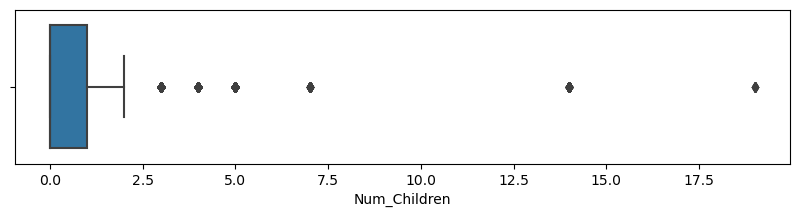

In [325]:
#Visualize the outliers in the 'Num_children' column
outliers(new_df,'Num_Children')

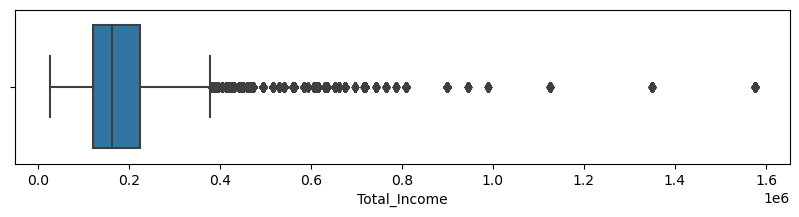

In [326]:
#Visualize the outliers in the 'Total_income' column
outliers(new_df,'Total_Income')

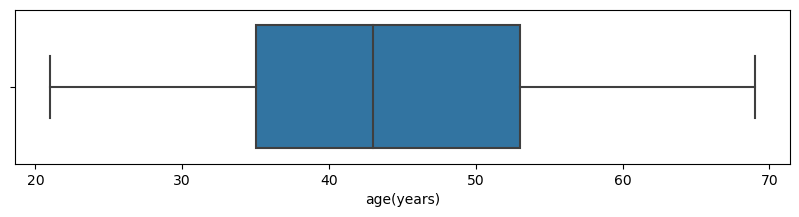

In [327]:
#Visualize the outliers in the 'Num_children' column
outliers(new_df,'age(years)')

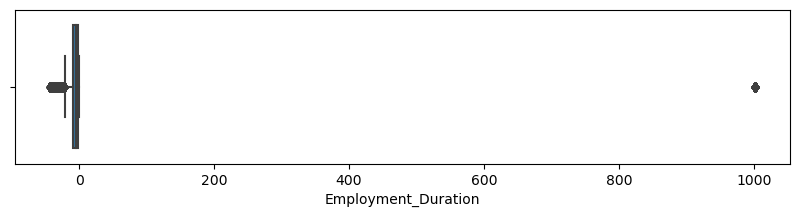

In [328]:
#Visualize the outliers in the 'employment_duration' column
outliers(new_df,'Employment_Duration')

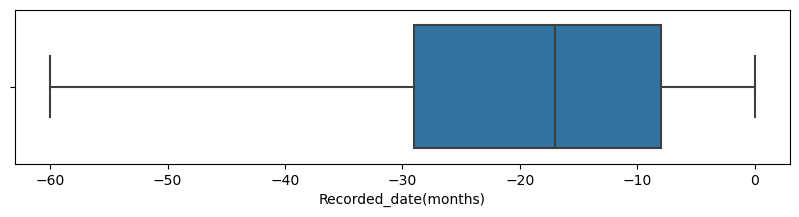

In [329]:
#Visualize the outliers in the 'Recorded_date(Months)' column
outliers(new_df,'Recorded_date(months)')

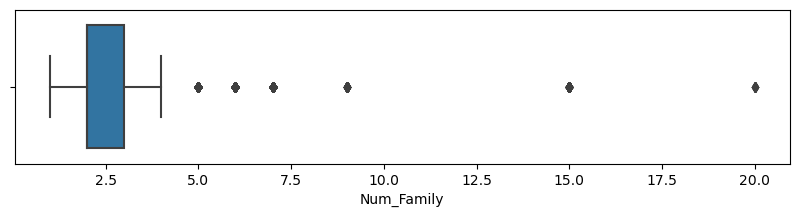

In [330]:
#Visualize the outliers in the 'Num_family' column
outliers(new_df,'Num_Family')

*** `Insights`***

Although the dataset contains outliers, we will proceed with exploratory data analysis (EDA) to gain deeper insights into the data. By conducting EDA, we aim to uncover patterns, relationships, and underlying trends that can help us understand the data better.

We are not going to drop the outliers in the columns Num_Children and Num_family since its hard to determine the number of children a family can have and the family size a client can have.Also for case of total income its dense to determine the total income of a client since the occupation differs from one client to another

## 3.2 Exploratory Data Analysis

>> In this section, we shall be exploring the columns in the dataset. We shall be performing the following

* Univariate Analysis

* Bivariate Analysis

* Multi-variate Analysis

### 3.2.1 Univariate Analysis
> In this section, we'll explore each column in the dataset to see the distributions of features and obtain some useful insights. 

In [331]:
#Creating a function to get the value count
def get_value_counts(df, id_col, cat_col):

    # Aggregate the data by ID and select the unique categorical value for each ID
    aggregated_df = df.groupby(id_col)[cat_col].unique().str[0]
    
    # Calculate the value counts
    value_counts = aggregated_df.value_counts()

    # Print the unique values and counts
    for value, count in value_counts.items():
        print(f'{value}: {count}')

    # Handle the case when there are no values
    if len(value_counts) == 0:
        data_type = df[cat_col].dtype
        print(f'{cat_col}: {data_type} (Length: {len(df)}, dtype: {data_type})')


In [332]:
#Creating a function to determine the categorical 
def plot_categorical_counts(df, id_col, cat_col, title):
    """
    Aggregates the categorical column based on the ID column and plots the counts.
    
    Parameters:
        df (pandas.DataFrame): The DataFrame containing the data.
        id_col (str): The name of the ID column.
        cat_col (str): The name of the categorical column.
        title (str): The title for the plot.
    """
    # Aggregate the data by ID and select the unique categorical value for each ID
    aggregated_df = df.groupby(id_col)[cat_col].unique().str[0]
    
    # Calculate the value counts and percentages
    value_counts = aggregated_df.value_counts()
    total = value_counts.sum()
    percentages = (value_counts / total) * 100
    
    # Plot the counts of the categorical column
    fig, ax = plt.subplots(figsize=(11, 5))
    value_counts.plot(kind='bar', ax=ax)
    
    # Set plot labels and title
    plt.xlabel(cat_col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.title(title, fontsize=14)
    
    # Print value counts and percentages on top of each bar
    for i, count in enumerate(value_counts):
        percentage = percentages[i]
        ax.text(i, count, f'{count} ({percentage:.1f}%)', ha='center', va='bottom', fontsize=10)
    
    # Display the plot
    plt.show()

#### `3.2.1.1 Status`

C: 17950
X: 9669
0: 8456
1: 276
5: 76
2: 19
3: 6
4: 5
None


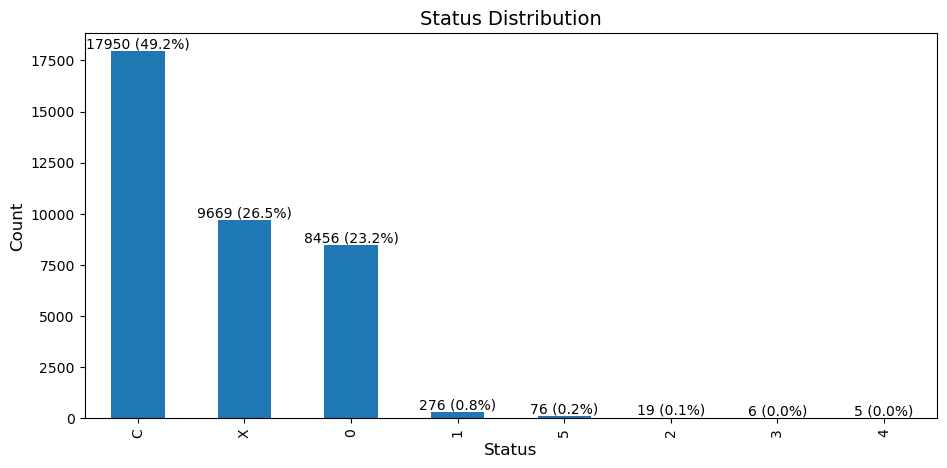

In [333]:
#checking for the 
print(get_value_counts(new_df, 'ID','Status'))
plot_categorical_counts(new_df, 'ID', 'Status', 'Status Distribution')

The value `C` appears the most frequent status, with a count of 17950, accounting for 49.2% of the total counts.

The next most common value is `X` with a count of 9669, representing 26.5% of the total.

The value `0` has a count of 8456, making up 23.2% of the total.

There are relatively fewer occurrences of the values "1" (276), "5" (76), "2" (19), "3" (6), and "4" (5), each representing a small percentage of the total count.

#### `3.2.1.2 Gender`

F: 24430
M: 12027
None


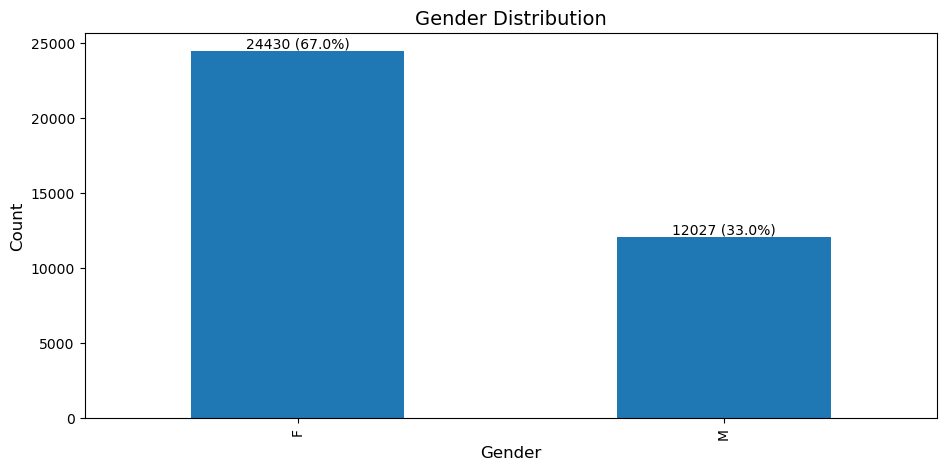

In [334]:
print(get_value_counts(new_df, 'ID','Gender'))
plot_categorical_counts(new_df, 'ID', 'Gender', 'Gender Distribution')

The value `"F" (Female)` appears more frequently with a count of 24430, accounting for approximately 67.05% of the total counts in the column.
The value `"M" (Male)` has a count of 12027, representing around 32.95% of the total counts

In [335]:
def plot_categorical_data(df, id_col, cat_col, title):
    """
    Aggregates the categorical column based on the ID column and plots the counts horizontally with percentages at the end of each bar.
    
    Parameters:
        df (pandas.DataFrame): The DataFrame containing the data.
        id_col (str): The name of the ID column.
        cat_col (str): The name of the categorical column.
        title (str): The title for the plot.
    """
    # Aggregate the data by ID and select the unique categorical value for each ID
    aggregated_df = df.groupby(id_col)[cat_col].unique().str[0]
    
    # Calculate the value counts and percentages
    value_counts = aggregated_df.value_counts()
    total = value_counts.sum()
    percentages = (value_counts / total) * 100
    
    # Sort the categories based on highest percentage
    sorted_categories = percentages.sort_values(ascending=False).index
    
    # Plot the counts of the categorical column horizontally
    fig, ax = plt.subplots(figsize=(11, 5))
    sns.countplot(y=cat_col, data=df, order=sorted_categories, color='#037bfc', edgecolor='black', ax=ax)
    
    # Set plot labels and title
    plt.xlabel('Count', fontsize=12)
    plt.ylabel(cat_col, fontsize=12)
    plt.title(title, fontsize=14)
    
    # Remove spines and grid
    plt.gca().spines['top'].set_visible(True)
    plt.gca().spines['right'].set_visible(True)
    plt.gca().spines['bottom'].set_visible(True)
    plt.gca().spines['left'].set_visible(True)
    plt.grid(False)
    
    # Add edges around the plot
    for spine in plt.gca().spines.values():
        spine.set_edgecolor('black')
    for patch in ax.patches:
        patch.set_edgecolor('black')
    
    # Display the plot
    plt.show()


#### `3.2.1.3 Occupation`

unspecified: 11323
Laborers: 6211
Core staff: 3591
Sales staff: 3485
Managers: 3012
Drivers: 2138
High skill tech staff: 1383
Accountants: 1241
Medicine staff: 1207
Cooking staff: 655
Security staff: 592
Cleaning staff: 551
Private service staff: 344
Low-skill Laborers: 175
Waiters/barmen staff: 174
Secretaries: 151
HR staff: 85
Realty agents: 79
IT staff: 60
None


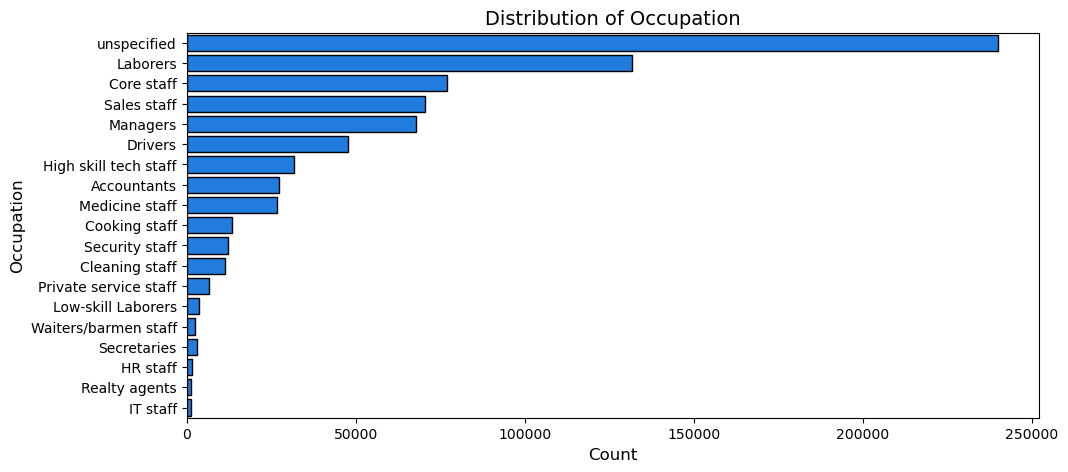

In [336]:
print(get_value_counts(new_df,'ID','Occupation'))
plot_categorical_data(new_df,'ID', 'Occupation', 'Distribution of Occupation')

The `Unspecified` category has a count of 11323, which represents approximately 30.95% of the total counts in the "Occupation" column.

The next most frequent occupations are `Laborers` with 6211 counts (16.97%), followed by `Core staff` with 3591 counts (9.82%).

Other significant occupations include `Sales staff` (3485 counts, 9.52%), `Managers` (3012 counts, 8.24%), and "Drivers" (2138 counts, 5.85%).

#### `3.2.1.4 Income_Type`

Working: 18819
Commercial associate: 8490
Pensioner: 6152
State servant: 2985
Student: 11
None


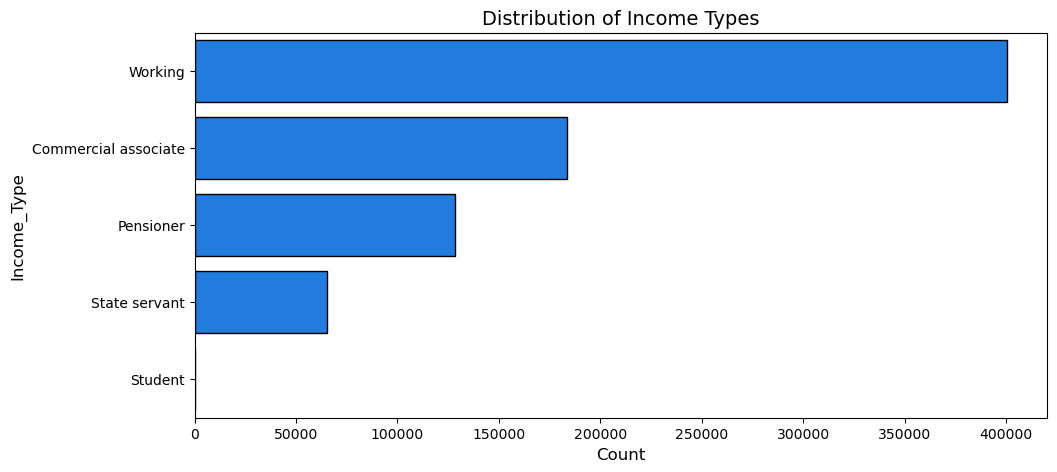

In [337]:
print(get_value_counts(new_df,'ID', 'Income_Type'))
plot_categorical_data(new_df,'ID', 'Income_Type', 'Distribution of Income Types')

`Working` has the highest count with 18,819 occurrences, representing approximately 51.32% of the total counts in the "Income Type" column.

`Commercial associate` has a count of 8,490, accounting for around 23.11% of the total counts.

`Pensioner` is the third most common category with a count of 6,152, making up approximately 16.76% of the total counts.

#### `3.2.1.5 Education_Level`

Secondary: 24777
Higher education: 9864
Incomplete higher: 1410
Lower secondary: 374
Academic degree: 32
None


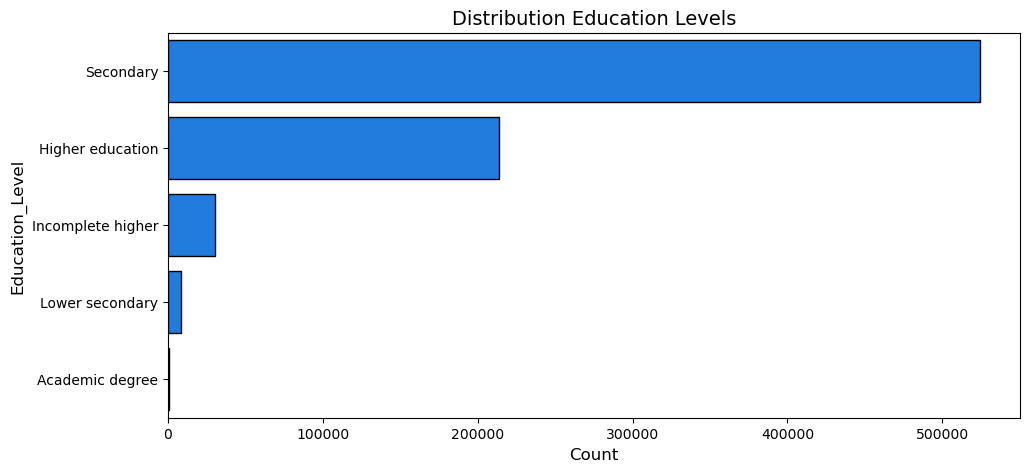

In [338]:
print(get_value_counts(new_df,'ID', 'Education_Level'))
plot_categorical_data(new_df,'ID','Education_Level', 'Distribution Education Levels')

`Secondary / secondary special` is the most common education type, with a count of 24,777. This category represents individuals who have completed secondary education or have a secondary special education. It accounts for approximately 66.17% of the total counts in the "Education Type" column.

`Higher education` is the second most common category, with a count of 9,864, making up around 26.28% of the total counts. This category includes individuals with a higher education degree.

`Academic degree` has the lowest count with 32 occurrences, indicating individuals who hold an academic degree. It contributes to a small portion of the total counts, approximately 0.09%.

#### `3.2.1.6 Housing_Type`

House / apartment: 32548
With parents: 1776
Municipal apartment: 1128
Rented apartment: 575
Office apartment: 262
Co-op apartment: 168
None


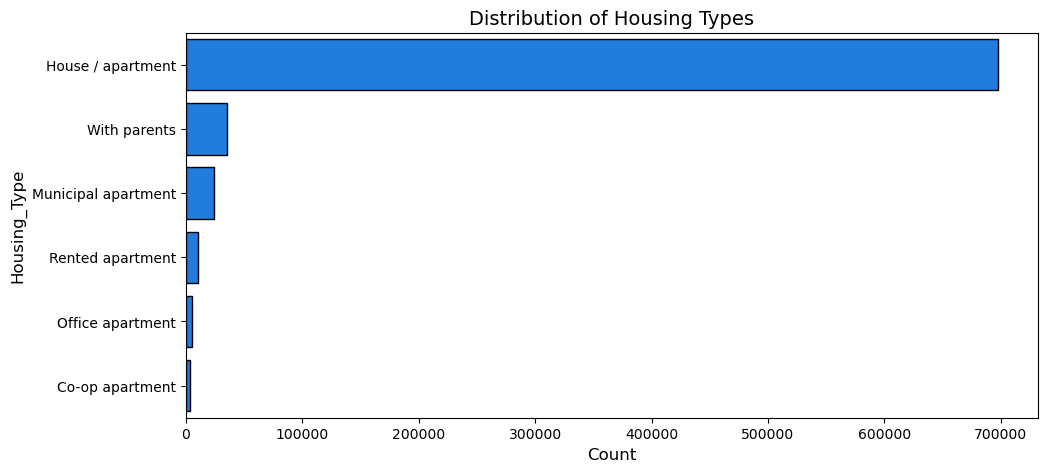

In [339]:
print(get_value_counts(new_df,'ID', 'Housing_Type'))
plot_categorical_data(new_df,'ID', 'Housing_Type', 'Distribution of Housing Types')

`House / apartment` is the most common housing type, with a count of 32,548. This category represents individuals who live in their own house or apartment. It accounts for approximately 91.29% of the total counts in the "Housing Type" column.

`With parents` has a count of 1,776, indicating individuals who live with their parents. It represents around 4.99% of the total counts.

`Municipal apartment` has a count of 1,128, accounting for about 3.17% of the total counts. This category includes individuals who reside in apartments owned by the municipality.

`Rented apartment` has a count of 575, representing approximately 1.62% of the total counts. It includes individuals who live in apartments that are rented.

#### `3.2.1.7 Family_Status`

Married: 25048
Single: 4829
Civil marriage: 2945
Separated: 2103
Widow: 1532
None


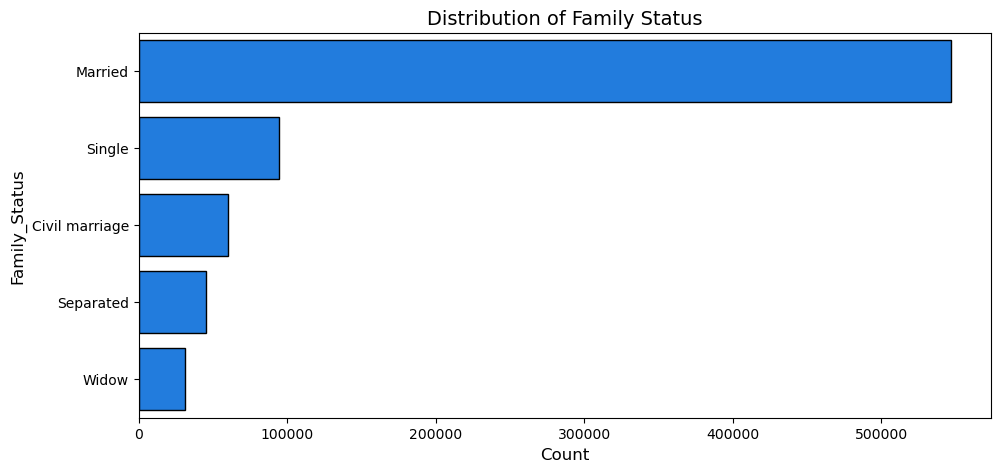

In [340]:
print(get_value_counts(new_df,'ID', 'Family_Status'))
plot_categorical_data(new_df,'ID', 'Family_Status', 'Distribution of Family Status')

`Married` is the most common family status, with a count of 25,048. This category represents individuals who are married. It accounts for approximately 70.34% of the total counts in the "Family Status" column.

`Single / not married` has a count of 4,829, indicating individuals who are single and not currently married. It represents around 13.56% of the total counts.

`Civil marriage` has a count of 2,945, accounting for about 8.26% of the total counts. This category includes individuals who are in a civil partnership or civil marriage.

#### `3.2.1.8 Num_Children`

0: 25201
1: 7492
2: 3256
3: 419
4: 63
5: 20
14: 3
7: 2
19: 1
None


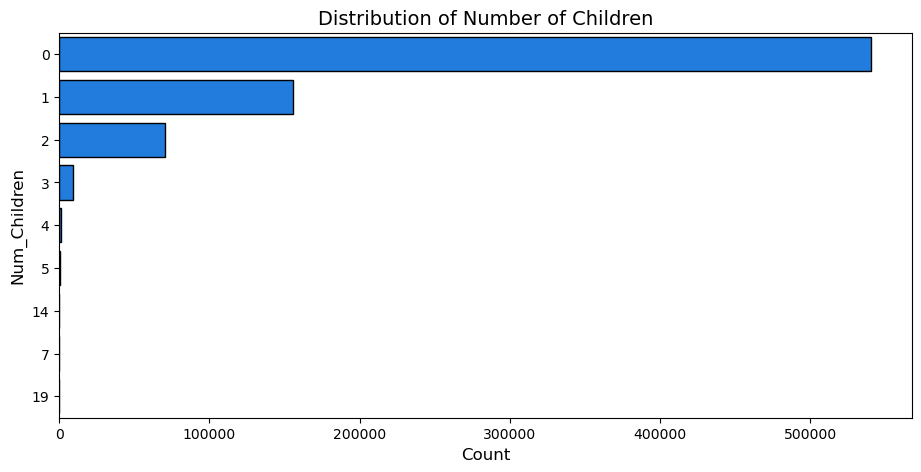

In [341]:
print(get_value_counts(new_df,'ID','Num_Children'))
plot_categorical_data(new_df,'ID', 'Num_Children', 'Distribution of Number of Children')

`0` has the highest count, with 25,201 occurrences. This category represents individuals who do not have any children. It accounts for approximately 67.03% of the total counts in the "Number of Children" column.

`1` has a count of 7,492, indicating individuals who have one child. It represents around 19.88% of the total counts.

`2` has a count of 3,256, accounting for about 8.64% of the total counts. This category includes individuals who have two children.

#### `3.2.1.9 Total_Income`

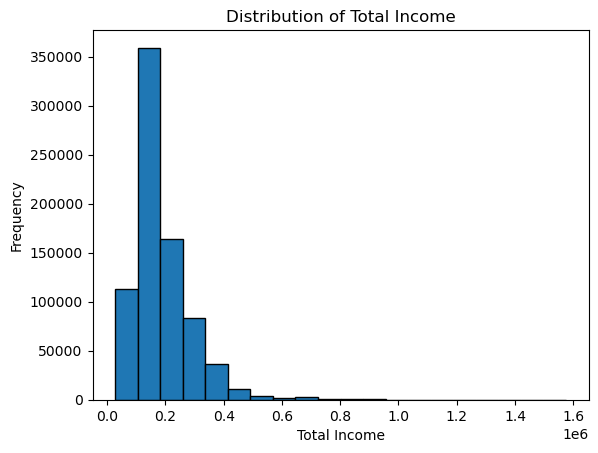

In [342]:
# Plot the distribution of Total_Income
plt.hist(new_df['Total_Income'], bins=20, edgecolor='black')
plt.xlabel('Total Income')
plt.ylabel('Frequency')
plt.title('Distribution of Total Income')
plt.show()

### 3.2.2 Bivariate Analysis
> In this section, we are evaluating the relationship between the features columns including our target column `Status`

#### `3.2.2.1 status and income type`

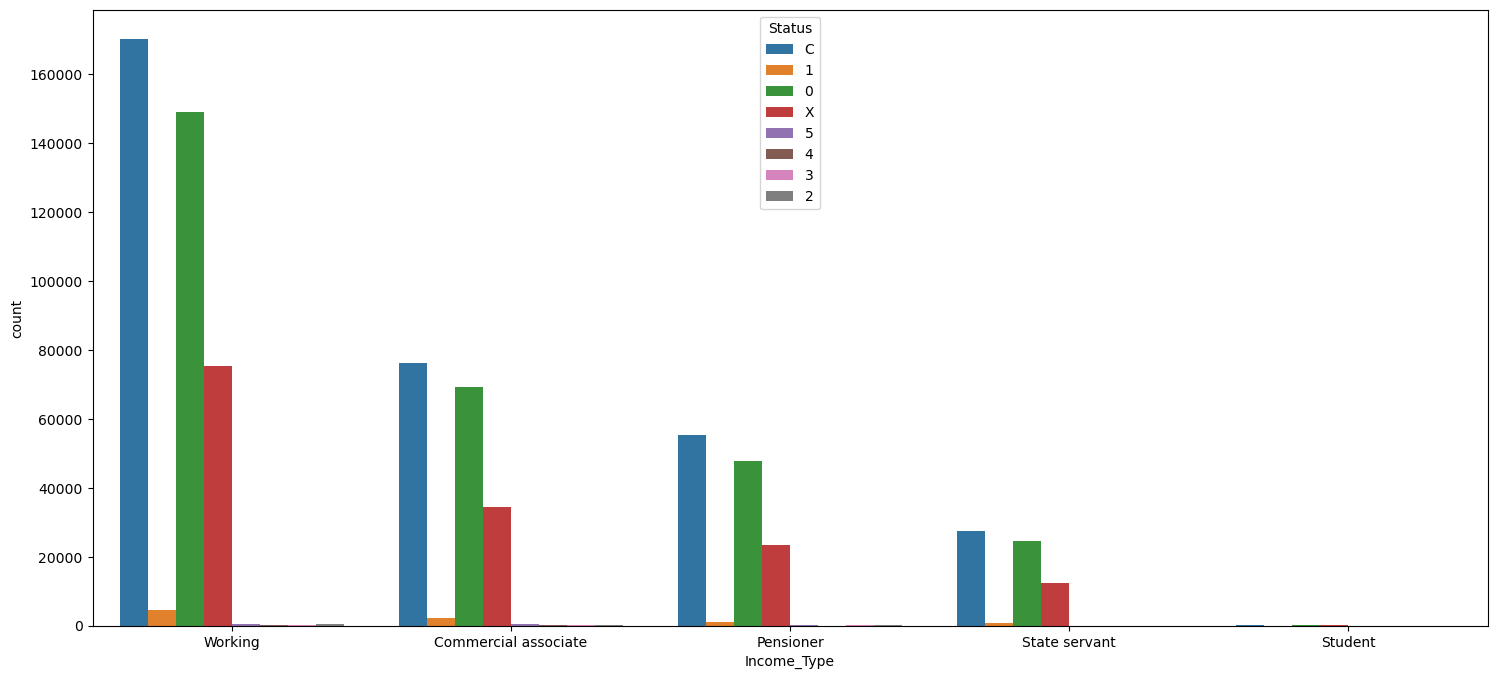

In [343]:
#Comparing status and income type 
plt.figure(figsize=(18,8))
ax = sns.countplot(x='Income_Type', hue="Status", data=new_df)

#### `3.2.2.2 status and property ownership`

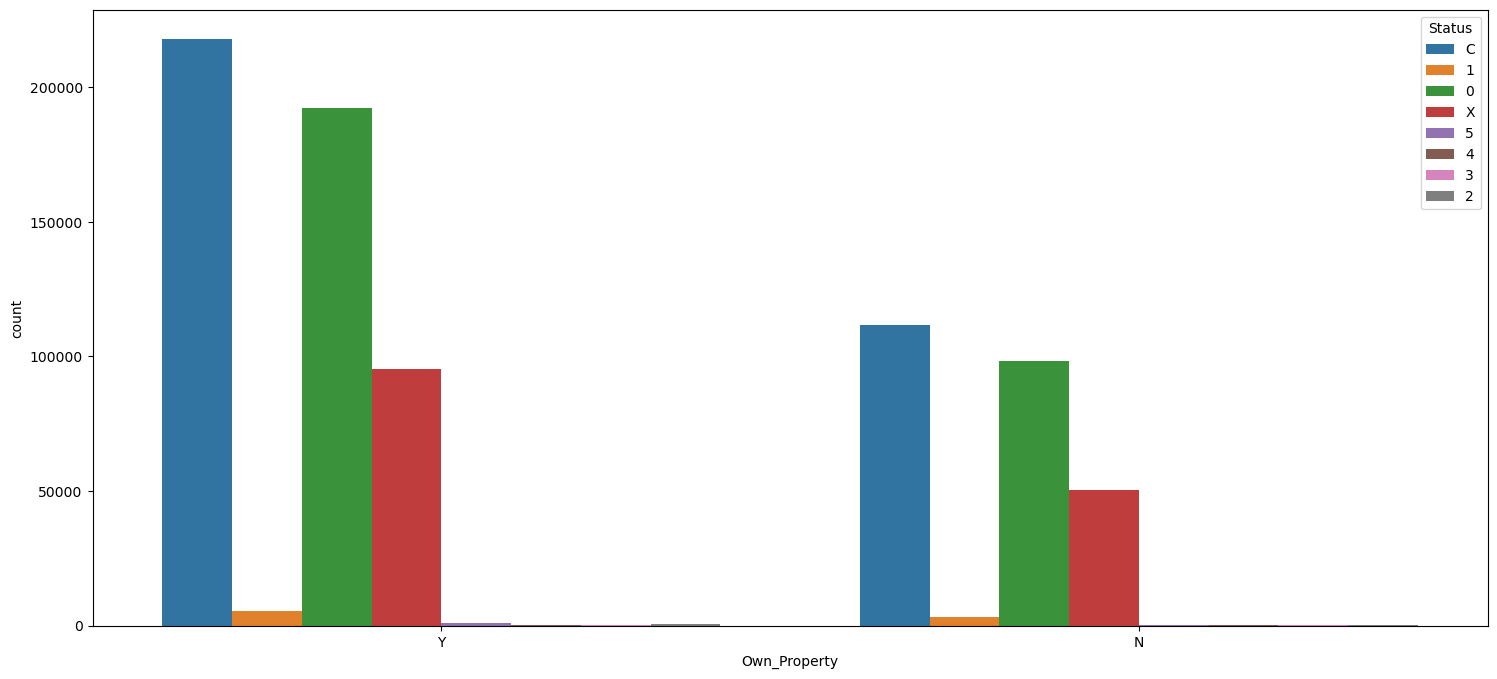

In [344]:
## Comparing status and property ownership
plt.figure(figsize=(18,8))
ax = sns.countplot(x='Own_Property', hue="Status", data=new_df)

#### `3.2.2.3 status and  Gender`

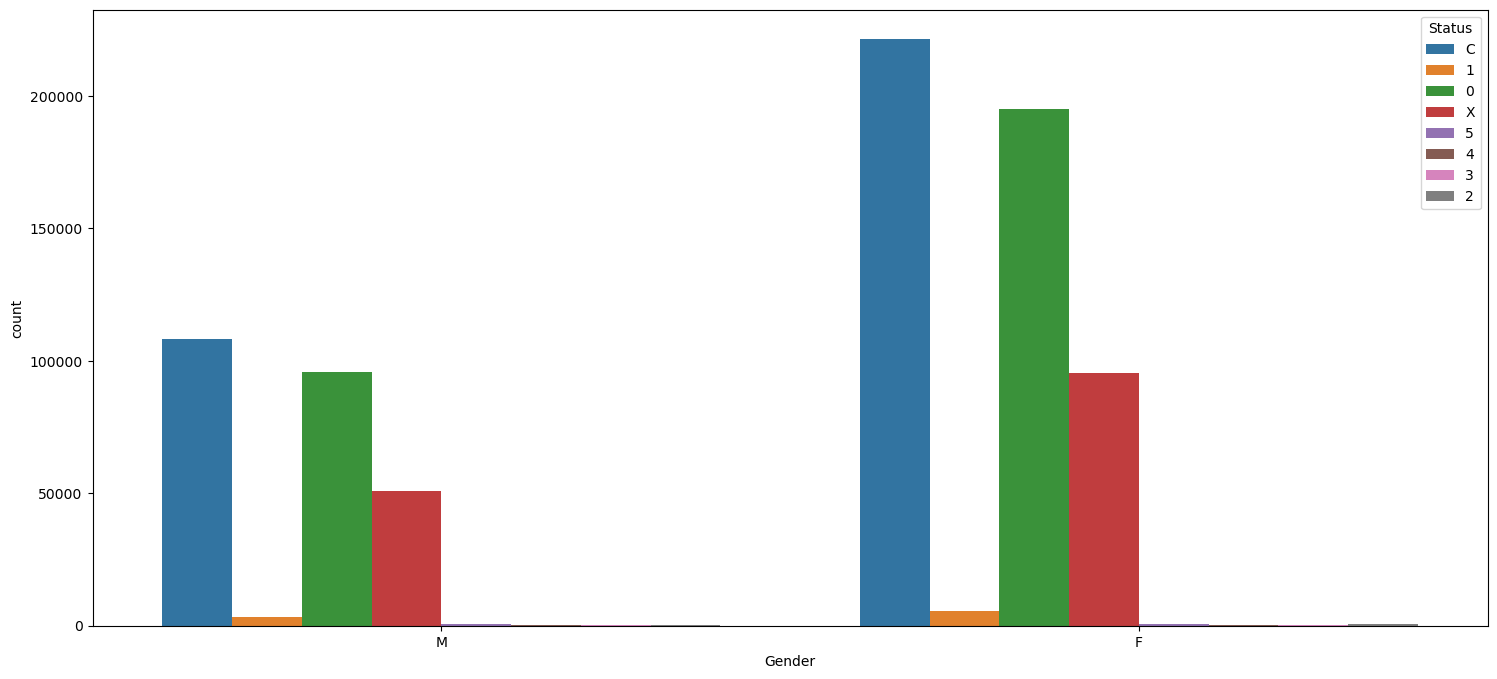

In [345]:
## Comparing status and Gender
plt.figure(figsize=(18,8))
ax = sns.countplot(x='Gender', hue="Status", data=new_df)

### 3.2.3 Multivariate Analysis

In [346]:
# Finding correlation between features using a heatmap
def corrmatrix(df):
    ''' This function plots a correlation matrix for a given dataframe '''
    plt.figure(figsize=(10, 5))

    corr = df.corr()

    # Generate a mask to only show the bottom triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # generate heatmap
    sns.heatmap(round(corr,2), annot=True, mask=mask, vmin=-1, vmax=1, cmap='Blues')
    plt.title('Correlation of Features')
    plt.show()

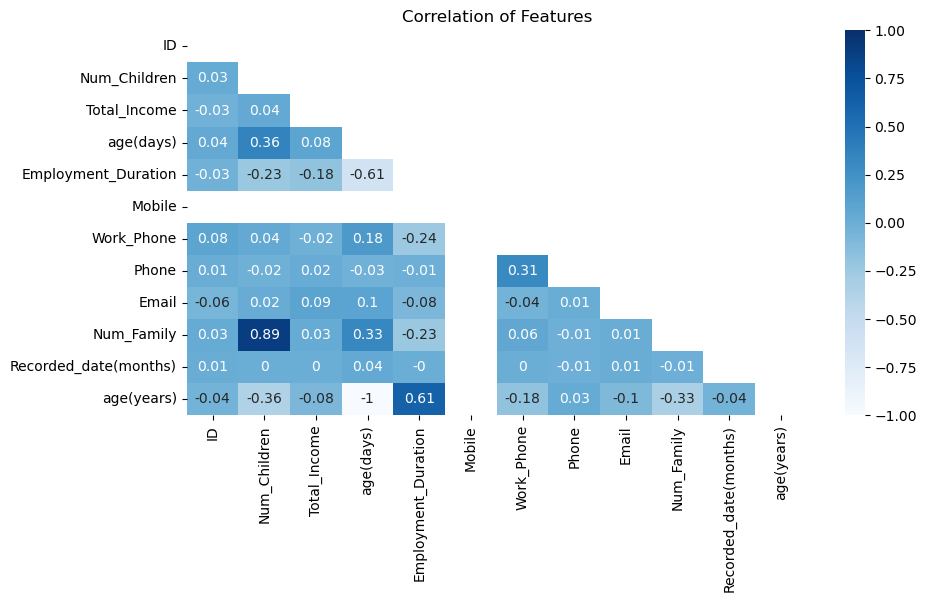

In [347]:
numeric_columns = new_df.select_dtypes(include='number').columns
corrmatrix(new_df[numeric_columns])

## 3.3. Data Preprocessing

## 3.3.1 Feature Engineering

>> Creating an approval status column from the Status Column

In [348]:
get_value_counts(new_df, 'ID','Status')

C: 17950
X: 9669
0: 8456
1: 276
5: 76
2: 19
3: 6
4: 5


In [349]:
# mapping the Status into a more readable format

convert_to = {'C' : 'likely_good_debtor', 
              'X' : 'likely_good_debtor',
              '0' : 'Neutral_Debtor', 
              '1' : 'Neutral_Debtor', 
              '2' : 'likely_Bad_Debtor', 
              '3' : 'likely_Bad_Debtor', 
              '4' : 'likely_Bad_Debtor', 
              '5' : 'likely_written_off'}

new_df.replace({'Status' : convert_to}, inplace=True)

get_value_counts(new_df, 'ID','Status')


likely_good_debtor: 27619
Neutral_Debtor: 8732
likely_written_off: 76
likely_Bad_Debtor: 30


In [350]:
# creating a credit record df to better view the Statuses of various individuals

credit_record = (new_df.value_counts(subset=['ID', 'Status']).unstack(fill_value=0)).reset_index()

# viewing the first five rows

credit_record.head()

Status,ID,Neutral_Debtor,likely_Bad_Debtor,likely_good_debtor,likely_written_off
0,5008804,2,0,14,0
1,5008805,2,0,13,0
2,5008806,7,0,23,0
3,5008808,2,0,3,0
4,5008809,0,0,5,0


> from this, based on the bank risk appetite we will categorize the debtors into subsections of:
1. `Approved` : likely_good_debtor, Neutral_Debtor
3. `Denied` : likely_Bad_Debtor, likely_written_off

In [351]:

def update_credit_approval_status(credit_record):
    conditions = [
        (credit_record['likely_good_debtor'] > credit_record['Neutral_Debtor']),
        (credit_record['likely_good_debtor'] > credit_record['likely_Bad_Debtor']),
        (credit_record['likely_good_debtor'] > credit_record['likely_written_off']),
        (credit_record['Neutral_Debtor'] > credit_record['likely_good_debtor']),
        (credit_record['Neutral_Debtor'] > credit_record['likely_Bad_Debtor']),
        (credit_record['Neutral_Debtor'] > credit_record['likely_written_off']),
        (credit_record['likely_Bad_Debtor'] > credit_record['likely_good_debtor']),
        (credit_record['likely_Bad_Debtor'] > credit_record['Neutral_Debtor']),
        (credit_record['likely_Bad_Debtor'] > credit_record['likely_written_off']),
        (credit_record['likely_written_off'] > credit_record['likely_good_debtor']),
        (credit_record['likely_written_off'] > credit_record['Neutral_Debtor']),
        (credit_record['likely_written_off'] > credit_record['likely_Bad_Debtor'])
    ]
    
    choices = [
        'approved', 'approved', 'approved',
        'Denied', 'Denied', 'Denied',
        'Denied', 'Denied', 'Denied',
        'Denied', 'Denied', 'Denied'
    ]
    
    credit_record['CREDIT_APPROVAL_STATUS'] = pd.Series(
        np.select(conditions, choices, default=''),
        index=credit_record.index
    )
    
    return credit_record


In [352]:
# classifying out debtors

updated_credit_record = update_credit_approval_status(credit_record)


In [353]:
# getting our value counts of the CREDIT_APPROVAL_STATUS


get_value_counts(updated_credit_record, 'ID','CREDIT_APPROVAL_STATUS')


approved: 31384
Denied: 5073


> with this we can now merge our data set with the new feature

In [354]:
# Selecting only the 'ID' and 'CREDIT_APPROVAL_STATUS' columns from the credit_record DataFrame

credit_record = credit_record[['ID', 'CREDIT_APPROVAL_STATUS']]

# Merging the new_df and credit_record DataFrames based on the 'ID' column

Final_data = new_df.merge(credit_record, how='inner', on=['ID'])

# Dropping any duplicate rows based on the 'ID' column in the Final_Credit_data DataFrame

Final_data.drop_duplicates(subset=['ID'], inplace=True)

# Displaying the first few rows of the Final_Credit_data DataFrame

Final_data.head()


,ID,Gender,Own_Car,Own_Property,Num_Children,Total_Income,Income_Type,Education_Level,Family_Status,Housing_Type,...,Mobile,Work_Phone,Phone,Email,Occupation,Num_Family,Recorded_date(months),Status,age(years),CREDIT_APPROVAL_STATUS
0,5008804,M,Y,Y,0,427500.000,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,unspecified,2,0,likely_good_debtor,33.000,approved
16,5008805,M,Y,Y,0,427500.000,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,unspecified,2,0,likely_good_debtor,33.000,approved
31,5008806,M,Y,Y,0,112500.000,Working,Secondary,Married,House / apartment,...,1,0,0,0,Security staff,2,0,likely_good_debtor,59.000,approved
61,5008808,F,N,Y,0,270000.000,Commercial associate,Secondary,Single,House / apartment,...,1,0,1,1,Sales staff,1,0,Neutral_Debtor,52.000,approved
66,5008809,F,N,Y,0,270000.000,Commercial associate,Secondary,Single,House / apartment,...,1,0,1,1,Sales staff,1,-22,likely_good_debtor,52.000,approved


> we will now drop some redundant columns:

1. `Mobile` : everyone has cellphone in our dataset so this column is not needed
2. `Num_children` : Num_Family encapsulates Num_children as well, so going forth we will use Num_family

In [355]:
# dropping the redundant columns

Final_data.drop(['Mobile', 'Num_Children', 'age(days)', 'ID'], axis = 1, inplace= True)


In [356]:
#confirming the new columns
Final_data.columns

Index(['Gender', 'Own_Car', 'Own_Property', 'Total_Income', 'Income_Type',
       'Education_Level', 'Family_Status', 'Housing_Type',
       'Employment_Duration', 'Work_Phone', 'Phone', 'Email', 'Occupation',
       'Num_Family', 'Recorded_date(months)', 'Status', 'age(years)',
       'CREDIT_APPROVAL_STATUS'],
      dtype='object')

> lets explore the `Total_income` column

> For purposes of uniformity, we are going to classify everyone within a range of income

In [357]:
# Set the display format for float values

pd.options.display.float_format = '{:.3f}'.format
Final_data.Total_Income.describe()

count     36457.000
mean     186685.737
std      101789.226
min       27000.000
25%      121500.000
50%      157500.000
75%      225000.000
max     1575000.000
Name: Total_Income, dtype: float64

* the minimum income is `27000`, we can assume that as our minimum cap as set by the bank as to whom qualifies for the credit card application
* Maximum for our data set is `1575000`
* We will create ranges in increments of `27000` hence categorizing income level

In [358]:
#To cater for incomes not in a range of  our dataset

import math
max_income = 1575000
bin_size = 27000

# Calculate the number of bins needed
num_bins = math.ceil(max_income / bin_size)

# Create the bins based on the bin size and number of bins
bins = [bin_size * i for i in range(num_bins + 1)]

# Create a new column 'Income_Range' based on the ranges of 'total_income'
Final_data['Income_Range'] = pd.cut(Final_data['Total_Income'], bins=bins, right=False)

# Map the interval representation to the desired format
Final_data['Income_Range'] = Final_data['Income_Range'].astype(str).str.replace('(', '').str.replace(']', '').str.replace(', ', '-').str.replace(')', '').str.replace('[', '')



In [359]:
# Re-arranging the column

column_to_move = 'Income_Range'  
new_position = 5  

# Pop the column from its current position

column = Final_data.pop(column_to_move)

# Insert the column at the new position

Final_data.insert(new_position, column_to_move, column)

# Print the updated DataFrame

Final_data

,Gender,Own_Car,Own_Property,Total_Income,Income_Type,Income_Range,Education_Level,Family_Status,Housing_Type,Employment_Duration,Work_Phone,Phone,Email,Occupation,Num_Family,Recorded_date(months),Status,age(years),CREDIT_APPROVAL_STATUS
0,M,Y,Y,427500.000,Working,405000-432000,Higher education,Civil marriage,Rented apartment,-12,1,0,0,unspecified,2,0,likely_good_debtor,33.000,approved
16,M,Y,Y,427500.000,Working,405000-432000,Higher education,Civil marriage,Rented apartment,-12,1,0,0,unspecified,2,0,likely_good_debtor,33.000,approved
31,M,Y,Y,112500.000,Working,108000-135000,Secondary,Married,House / apartment,-3,0,0,0,Security staff,2,0,likely_good_debtor,59.000,approved
61,F,N,Y,270000.000,Commercial associate,270000-297000,Secondary,Single,House / apartment,-8,0,1,1,Sales staff,1,0,Neutral_Debtor,52.000,approved
66,F,N,Y,270000.000,Commercial associate,270000-297000,Secondary,Single,House / apartment,-8,0,1,1,Sales staff,1,-22,likely_good_debtor,52.000,approved
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777622,M,Y,Y,315000.000,Working,297000-324000,Secondary,Married,House / apartment,-7,0,0,0,Managers,2,0,likely_written_off,48.000,approved
777634,F,N,Y,157500.000,Commercial associate,135000-162000,Higher education,Married,House / apartment,-4,0,1,1,Medicine staff,2,0,likely_good_debtor,34.000,approved
777658,F,N,Y,157500.000,Pensioner,135000-162000,Higher education,Married,House / apartment,-4,0,1,1,Medicine staff,2,0,likely_good_debtor,34.000,approved
777691,F,N,Y,283500.000,Working,270000-297000,Secondary,Married,House / apartment,-2,0,0,0,Sales staff,2,0,likely_Bad_Debtor,49.000,Denied


> `Recorded_month` is in months, this needs to change to years so that our time related data is standardized

In [360]:
#converting the recorded date into years
Final_data['Recorded_date(months)'] = (Final_data['Recorded_date(months)'] / 12)

In [361]:
# renaming the column

Final_data.rename(columns={'Recorded_date(months)': 'Recorded_date(Years)'}, inplace=True)

Final_data.head()


,Gender,Own_Car,Own_Property,Total_Income,Income_Type,Income_Range,Education_Level,Family_Status,Housing_Type,Employment_Duration,Work_Phone,Phone,Email,Occupation,Num_Family,Recorded_date(Years),Status,age(years),CREDIT_APPROVAL_STATUS
0,M,Y,Y,427500.000,Working,405000-432000,Higher education,Civil marriage,Rented apartment,-12,1,0,0,unspecified,2,0.000,likely_good_debtor,33.000,approved
16,M,Y,Y,427500.000,Working,405000-432000,Higher education,Civil marriage,Rented apartment,-12,1,0,0,unspecified,2,0.000,likely_good_debtor,33.000,approved
31,M,Y,Y,112500.000,Working,108000-135000,Secondary,Married,House / apartment,-3,0,0,0,Security staff,2,0.000,likely_good_debtor,59.000,approved
61,F,N,Y,270000.000,Commercial associate,270000-297000,Secondary,Single,House / apartment,-8,0,1,1,Sales staff,1,0.000,Neutral_Debtor,52.000,approved
66,F,N,Y,270000.000,Commercial associate,270000-297000,Secondary,Single,House / apartment,-8,0,1,1,Sales staff,1,-1.833,likely_good_debtor,52.000,approved


>> Now we are going to encode and standardize some of our features.

* For this we will use the Label Encoder and StandardScaler since some features have a natural order, and it also caters for those without the natural order

* First we will remove some columns that have been catered for through feature engineering

In [362]:
# creating our model_df 
model_df = Final_data.drop(columns=['Total_Income','Status', 'Recorded_date(Years)','Work_Phone','Phone'],axis =1)


In [363]:
model_df = model_df.sort_values(by='CREDIT_APPROVAL_STATUS', ascending=True)
model_df.head()

,Gender,Own_Car,Own_Property,Income_Type,Income_Range,Education_Level,Family_Status,Housing_Type,Employment_Duration,Email,Occupation,Num_Family,age(years),CREDIT_APPROVAL_STATUS
777701,M,N,Y,Working,108000-135000,Secondary,Single,Rented apartment,-3,0,Laborers,1,25.000,Denied
665428,F,N,N,Pensioner,54000-81000,Secondary,Married,House / apartment,1001,0,unspecified,2,59.000,Denied
665437,F,N,N,Pensioner,54000-81000,Secondary,Married,House / apartment,1001,0,unspecified,2,59.000,Denied
123959,F,N,N,Pensioner,270000-297000,Secondary,Widow,House / apartment,1001,0,unspecified,1,60.000,Denied
123929,M,N,N,Working,108000-135000,Secondary,Single,House / apartment,-4,0,Drivers,1,28.000,Denied


In [364]:
model_df['CREDIT_APPROVAL_STATUS'].value_counts()

CREDIT_APPROVAL_STATUS
approved    31384
Denied       5073
Name: count, dtype: int64

In [365]:
# lets us view our column types one more time before encoding and standardizing

# Get columns with float values

float_columns = model_df.select_dtypes(include=[np.float]).columns.tolist()

# Get columns with integer values

integer_columns = model_df.select_dtypes(include=[np.int]).columns.tolist()

# Get columns with object values excluding our target variables

object_columns = model_df.select_dtypes(include=[np.object]).columns.tolist()

# print("Float columns:", float_columns)
# print("Integer columns:", integer_columns)
# print("Object columns:", object_columns)



In [366]:
from sklearn.preprocessing import LabelEncoder, StandardScaler


# Defining the target columns
# target_columns = ['Status', 'CREDIT_APPROVAL_STATUS']

# creating instance for Encoder

encoder = LabelEncoder()

# Iterate over each column and apply LabelEncoder
for column in object_columns:
    model_df[column] = encoder.fit_transform(model_df[column])



In [367]:
#target_columns = model_df[['Status', 'CREDIT_APPROVAL_STATUS']]
#target_array = target_columns.values.ravel()
y = model_df['CREDIT_APPROVAL_STATUS']
X = model_df.drop(['CREDIT_APPROVAL_STATUS'],axis =1)


## 3.3.2 Feature selection

In [371]:
# Feature selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
def recursive_feature_elimination(X, y, n_features_to_select):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
    # Initialize the model and RFE
    model = DecisionTreeClassifier()  # Or any other model
    rfe = RFE(estimator=model, n_features_to_select=n_features_to_select)
    # Fit RFE to the training data
    rfe.fit(X_train, y_train)
    # Retrieve the selected features
    selected_features = X.columns[rfe.support_]
    # Subset the dataset with the selected features
    X_selected = X[selected_features]
    # Train and evaluate the model with the selected features
    model.fit(X_train[selected_features], y_train)
    accuracy = model.score(X_test[selected_features], y_test)
    return selected_features, accuracy
selected_features, accuracy = recursive_feature_elimination(X, y, n_features_to_select= 10)
print("Selected Features:", selected_features)

Selected Features: Index(['Gender', 'Own_Car', 'Own_Property', 'Income_Type', 'Income_Range',
       'Family_Status', 'Employment_Duration', 'Occupation', 'Num_Family',
       'age(years)'],
      dtype='object')


In [373]:

# Define the columns to include in X
columns_to_include = ['Gender', 'Own_Car', 'Own_Property', 'Income_Type', 'Income_Range',
       'Family_Status', 'Employment_Duration', 'Occupation', 'Num_Family',
       'age(years)']

# Create the feature matrix X by selecting the desired columns
X = model_df[columns_to_include]

# Print the feature matrix X
X.head()

,Gender,Own_Car,Own_Property,Income_Type,Income_Range,Family_Status,Employment_Duration,Occupation,Num_Family,age(years)
777701,1,0,1,4,0,3,-3,8,1,25.000
665428,0,0,0,1,20,1,1001,18,2,59.000
665437,0,0,0,1,20,1,1001,18,2,59.000
123959,0,0,0,1,10,4,1001,18,1,60.000
123929,1,0,0,4,0,3,-4,4,1,28.000


In [374]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve

# doing the train test split
from imblearn.over_sampling import SMOTE
# Apply SMOTE to the training data
smote = SMOTE()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, stratify=y, random_state=5)

X_train_resampled,y_train_resampled = smote.fit_resample(X_train, y_train)


def fit_train_score(model):

    start_time = time.time()
    

    model.fit(X_train_resampled,y_train_resampled)
    

    # predicting with X_test

    y_test_pred = model.predict(X_test)

    #accuracy score of the model on the training set.

    y_train_pred = model.predict(X_train)

    # End the timer

    end_time = time.time()

    #accuracy score of the model on the training set.

    accuracy_train = accuracy_score(y_train_pred,y_train)

    # the accuracy score of the model on the test set.

    accuracy_test = accuracy_score(y_test_pred, y_test)

    # performing cross validation
    cross_val = cross_val_score(model,X_train,y_train,cv = cv)

    # Calculate the elapsed time

    elapsed_time = end_time - start_time

    # Calculate the elapsed time

    print(f"Testing time: {elapsed_time} seconds")

    # Printing the scores
    print(f'Model Train accuracy: {accuracy_train:.3f}')
    print(f'Model Test accuracy: {accuracy_test:.3f}')
    print(f"Cross Validation Accuracy: {round(cross_val.mean()*100,4)}%")
    # creating confusion matrix
    cmatrix = confusion_matrix(y_test,y_test_pred)

    # Making the Confusion Matrix
    plt.figure(figsize=(8, 6))

    cmatrix = confusion_matrix(y_test_pred, y_test)

    ax = sns.heatmap(cmatrix,annot=True, fmt= 'd', cmap = 'BuPu')

     # Add labels to the x and y axes

    ax.set_xlabel('Predicted')

    ax.set_ylabel('True')

    print('\n')

    print ('***********************************', '\n')

    # printing the report

    print(classification_report(y_test, y_test_pred))
    


    

def plot_learning_curve(model):

    # Plotting the learning curve

    # Generate the learning curve using the learning_curve function

    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, scoring='accuracy')

    # Calculate the mean and standard deviation of the training scores

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    # Calculate the mean and standard deviation of the validation scores

    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot the training scores and fill the area between the upper and lower bounds

    plt.figure(figsize=(10, 8))
    plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
    plt.fill_between(
        train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')

    # Plot the validation scores and fill the area between the upper and lower bounds

    plt.plot(train_sizes, test_mean, 'o-', color='g', label='Validation score')
    plt.fill_between(
        train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')
    

    # Set the x-axis label
    

    plt.xlabel('Training examples')

    # Set the y-axis label

    plt.ylabel('Score')

    # Add a legend to the plot

    plt.legend(loc='best')

    # Add a grid to the plot

    plt.grid(True)
    plt.show()

    

## `BASE MODEL`  :

### <span style ='color : orange ' > Decision Tree </span>

Testing time: 3.088658332824707 seconds
Model Train accuracy: 0.867
Model Test accuracy: 0.783
Cross Validation Accuracy: 81.9578%


*********************************** 

              precision    recall  f1-score   support

           0       0.29      0.40      0.34      1015
           1       0.90      0.85      0.87      6277

    accuracy                           0.78      7292
   macro avg       0.59      0.62      0.60      7292
weighted avg       0.81      0.78      0.80      7292



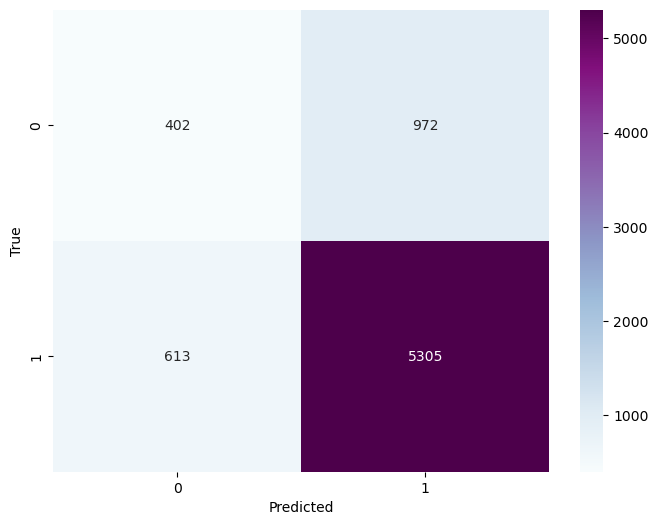

In [375]:
scaled_pipeline = Pipeline([('scaler' , StandardScaler()),
                            ('tree', DecisionTreeClassifier())])

# setting basic parameter
grid = [{'tree__criterion': ['entropy'], 
         }]

cv =10
base_decision_tree = GridSearchCV(estimator=scaled_pipeline, 
                          param_grid= grid,
                          scoring='accuracy',
                          cv=cv)

fit_train_score(base_decision_tree)

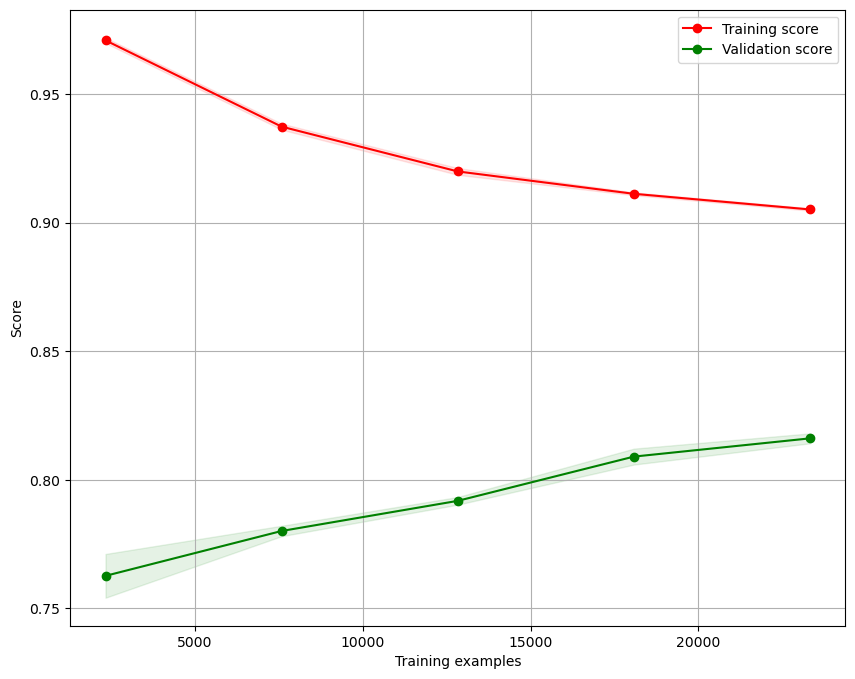

In [376]:
plot_learning_curve(base_decision_tree)

### <span style ='color : orange ' > Random Forest Classifier </span>

Testing time: 145.8555347919464 seconds
Model Train accuracy: 0.570
Model Test accuracy: 0.555
Cross Validation Accuracy: 86.0861%


*********************************** 

              precision    recall  f1-score   support

           0       0.15      0.47      0.23      1015
           1       0.87      0.57      0.69      6277

    accuracy                           0.56      7292
   macro avg       0.51      0.52      0.46      7292
weighted avg       0.77      0.56      0.62      7292



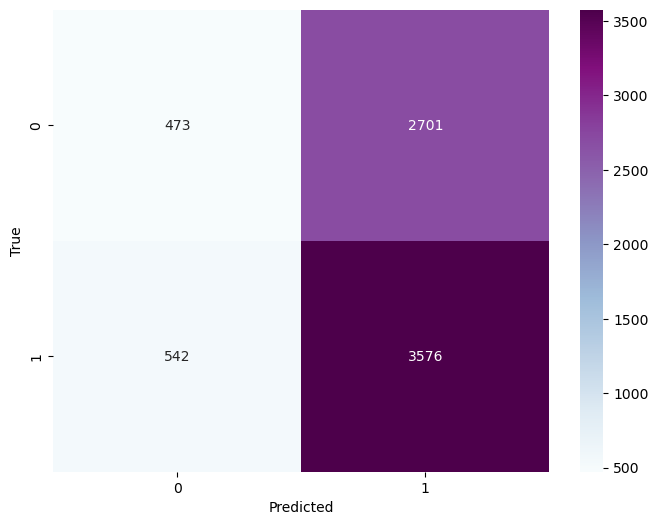

In [377]:
# importing the necessary library

from sklearn.ensemble import RandomForestClassifier

# defining our pipeline




scaled_pipeline1 = Pipeline([('scaler' , StandardScaler()),
                            ('tree1', RandomForestClassifier()),
                            ])
# setting our cv

cv= 6

# setting basic parameter


grid = [{'tree1__n_estimators' : [10, 30, 100],
         'tree1__criterion': ['gini', 'entropy'],
         'tree1__max_depth': [2,3,4,5,6],
         'tree1__min_samples_split': [len(range(5,10))],
         'tree1__min_samples_leaf': [len(range(5,10))]}]

# Setting up the grid search

random1 = GridSearchCV(estimator=scaled_pipeline1, 
                          param_grid= grid,
                          scoring='accuracy', 
                          cv=cv)

fit_train_score(random1)

In [378]:
# getting the best parameters of the random tree classifier

random1.best_params_

{'tree1__criterion': 'gini',
 'tree1__max_depth': 6,
 'tree1__min_samples_leaf': 5,
 'tree1__min_samples_split': 5,
 'tree1__n_estimators': 100}

### <span style ='color : orange ' > Random Forest Classifier with best parameters</span>

Testing time: 19.42569875717163 seconds
Model Train accuracy: 0.564
Model Test accuracy: 0.551
Cross Validation Accuracy: 86.0861%


*********************************** 

              precision    recall  f1-score   support

           0       0.15      0.48      0.23      1015
           1       0.87      0.56      0.68      6277

    accuracy                           0.55      7292
   macro avg       0.51      0.52      0.46      7292
weighted avg       0.77      0.55      0.62      7292



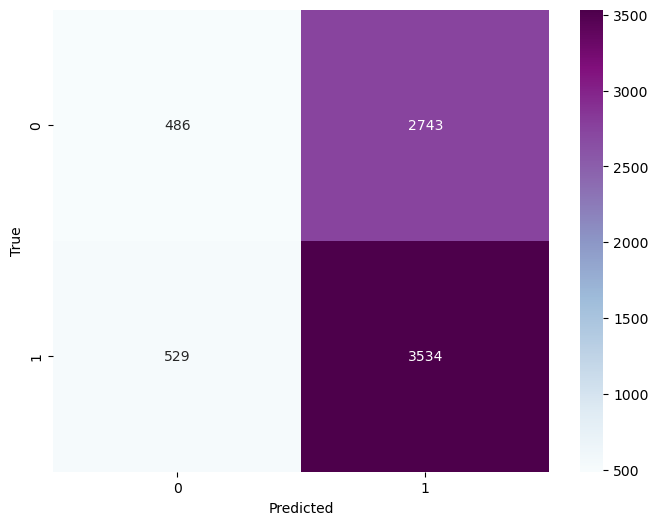

In [379]:
# setting the best parameters for our random tree classifier

grid = [{'tree1__criterion': ['gini'],
 'tree1__max_depth': [6],
 'tree1__min_samples_leaf': [5],
 'tree1__min_samples_split': [5],
 'tree1__n_estimators': [100]}]

# setting the cv to 5

cv= 6

# setting the grid search 

random_best = GridSearchCV(estimator=scaled_pipeline1, 
                          param_grid= grid,
                          scoring='accuracy', 
                          cv=cv)

# training and fitting the model

fit_train_score(random_best)

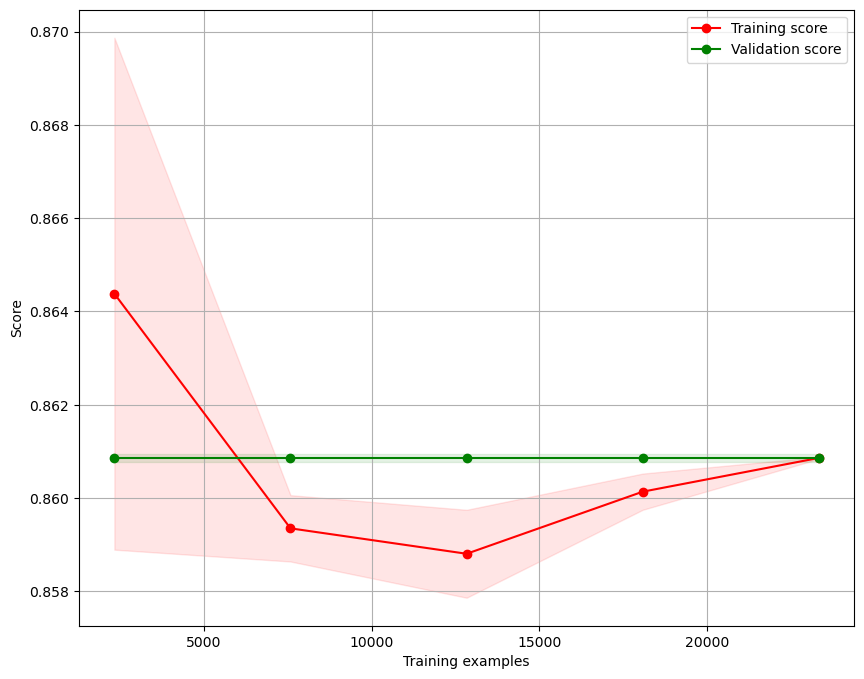

In [380]:
plot_learning_curve(random_best)

### <span style ='color : orange ' > AdaBoostClassifier </span>

Testing time: 46.80799961090088 seconds
Model Train accuracy: 0.560
Model Test accuracy: 0.557
Cross Validation Accuracy: 86.0826%


*********************************** 

              precision    recall  f1-score   support

           0       0.15      0.47      0.23      1015
           1       0.87      0.57      0.69      6277

    accuracy                           0.56      7292
   macro avg       0.51      0.52      0.46      7292
weighted avg       0.77      0.56      0.63      7292



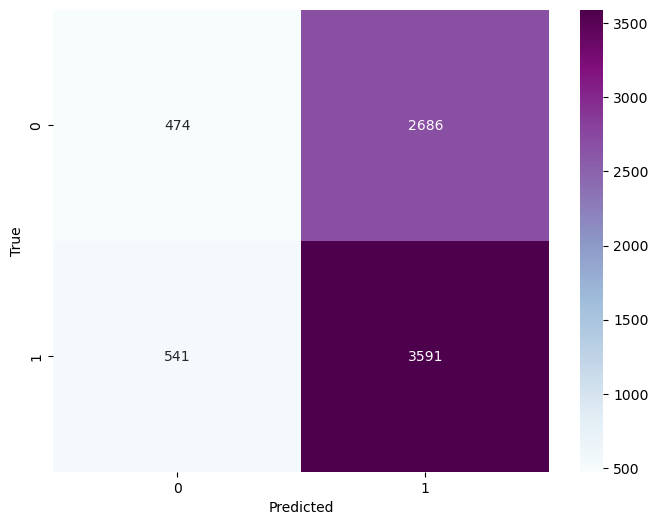

In [381]:
# ADA BOOSTING

from sklearn.ensemble import AdaBoostClassifier

# setting the pipeline

scaled_pipeline3 = Pipeline([('scaler' , StandardScaler()),
                            ('ADA', AdaBoostClassifier())])

# setting basic parameter
ada = [{'ADA__learning_rate': [0.2, 0.3, 0.4, 0.5],
         'ADA__n_estimators': [len(range(1,60))]}]

adaboost = GridSearchCV(estimator=scaled_pipeline3, 
                          param_grid= ada,
                          scoring='accuracy', 
                          cv=6)

fit_train_score(adaboost)

In [382]:
adaboost.best_params_

{'ADA__learning_rate': 0.5, 'ADA__n_estimators': 59}

### <span style ='color : orange ' > AdaBoostClassifier with best parameters</span>

Testing time: 16.953383922576904 seconds
Model Train accuracy: 0.548
Model Test accuracy: 0.539
Cross Validation Accuracy: 86.0826%


*********************************** 

              precision    recall  f1-score   support

           0       0.14      0.47      0.22      1015
           1       0.86      0.55      0.67      6277

    accuracy                           0.54      7292
   macro avg       0.50      0.51      0.45      7292
weighted avg       0.76      0.54      0.61      7292



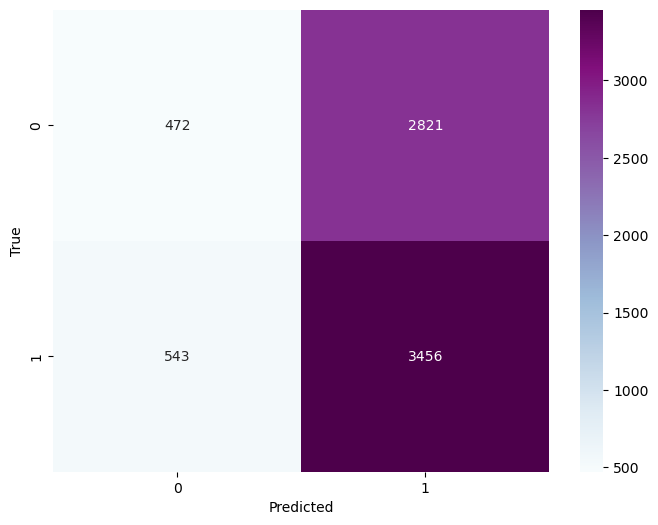

In [383]:
# setting best parameter

ada2 = [{'ADA__learning_rate': [0.2],
         'ADA__n_estimators': [59]}]

# setting the gridsearch

adaboost_best = GridSearchCV(estimator=scaled_pipeline3, 
                          param_grid= ada2,
                          scoring='accuracy', 
                          cv=6)

fit_train_score(adaboost_best)

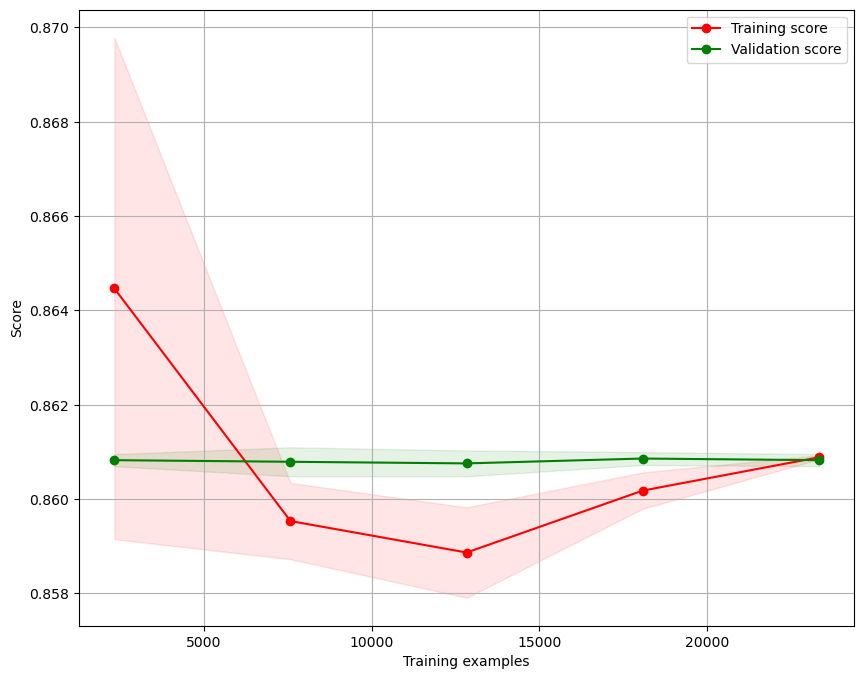

In [384]:
# plotting the learning curve

plot_learning_curve(adaboost_best)


### <span style ='color : orange ' > Gradient Boosting</span>

Testing time: 65.39589929580688 seconds
Model Train accuracy: 0.763
Model Test accuracy: 0.752
Cross Validation Accuracy: 86.1066%


*********************************** 

              precision    recall  f1-score   support

           0       0.18      0.21      0.19      1015
           1       0.87      0.84      0.85      6277

    accuracy                           0.75      7292
   macro avg       0.52      0.53      0.52      7292
weighted avg       0.77      0.75      0.76      7292



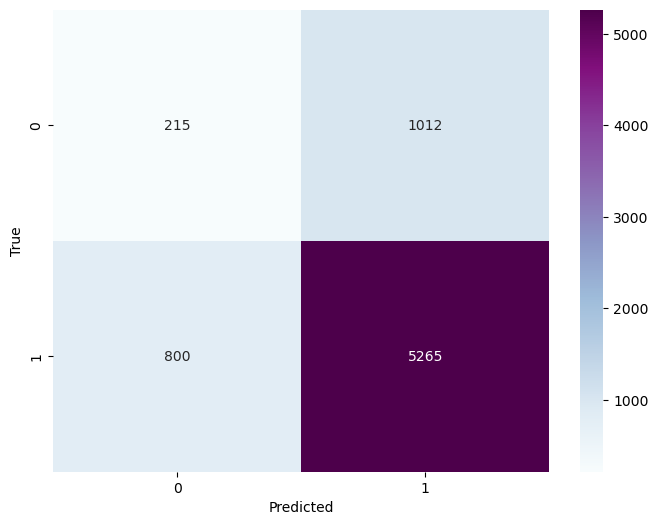

In [385]:
# importing the required module

from sklearn.ensemble import GradientBoostingClassifier

# initializing the pipeline

scaled_pipeline2 = Pipeline([('scaler' , StandardScaler()),
                            ('gradient', GradientBoostingClassifier())])

cv= 5
# setting basic parameter
grid2 = [{'gradient__loss' : ['log_loss', 'deviance'],
         'gradient__learning_rate': [0.1, 0.2, 0.3],
         'gradient__n_estimators': [len(range(1,100))],}]

gridsearch2 = GridSearchCV(estimator=scaled_pipeline2, 
                          param_grid= grid2,
                          scoring='accuracy', 
                          cv=cv,
                           verbose= False)

fit_train_score(gridsearch2)

In [386]:
gridsearch2.best_params_

{'gradient__learning_rate': 0.3,
 'gradient__loss': 'deviance',
 'gradient__n_estimators': 99}

### <span style ='color : orange ' > Gradient Boosting Classifier with best parameters</span>

Testing time: 29.081703186035156 seconds
Model Train accuracy: 0.763
Model Test accuracy: 0.751
Cross Validation Accuracy: 86.0278%


*********************************** 

              precision    recall  f1-score   support

           0       0.18      0.21      0.19      1015
           1       0.87      0.84      0.85      6277

    accuracy                           0.75      7292
   macro avg       0.52      0.53      0.52      7292
weighted avg       0.77      0.75      0.76      7292



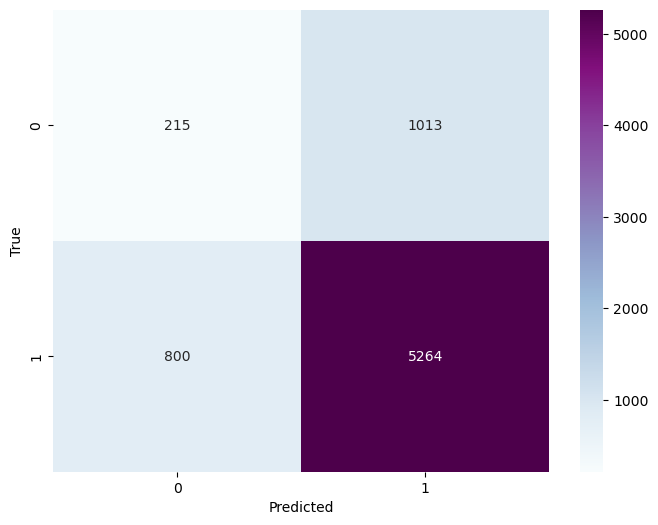

In [387]:
# setting the cv

cv= 5

# setting best parameters

grid2 = [{'gradient__loss' : ['deviance'],
         'gradient__learning_rate': [0.3],
         'gradient__n_estimators': [99]}]

# setting the grid search

gradient_best = GridSearchCV(estimator=scaled_pipeline2, 
                          param_grid= grid2,
                          scoring='accuracy', 
                          cv=cv)

# fitting and training the model

fit_train_score(gradient_best)

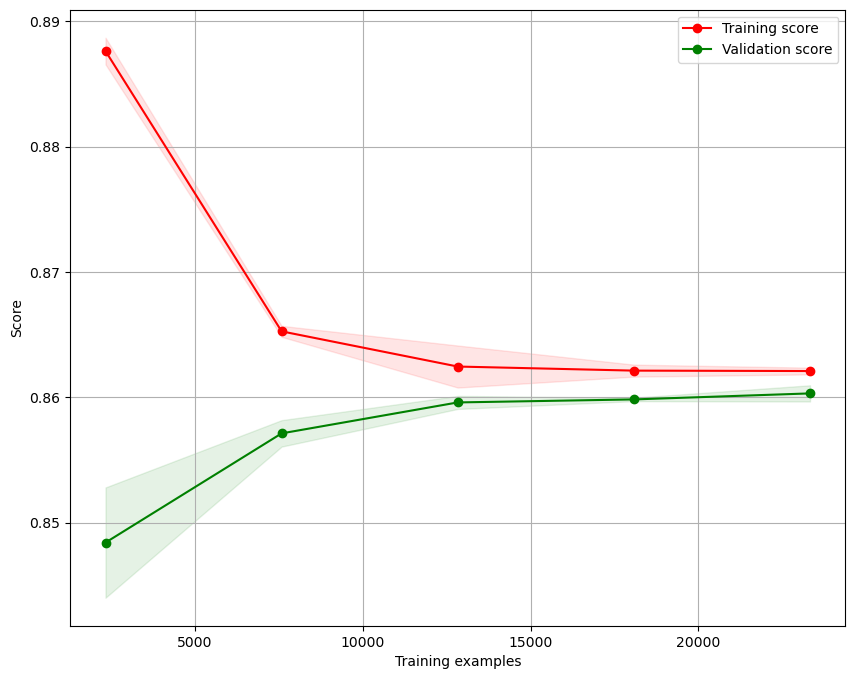

In [388]:
# plotting the learning curve

plot_learning_curve(gradient_best)

# Finding the best model, and incorporation shap values for recommendation purposes